In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv('/content/alzheimers_disease_data.csv')

In [ ]:
print(data.head())
data = data.drop(columns=['DoctorInCharge'])

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [6]:
data.shape

(2149, 35)

In [4]:
data.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

# Correlation Matrix

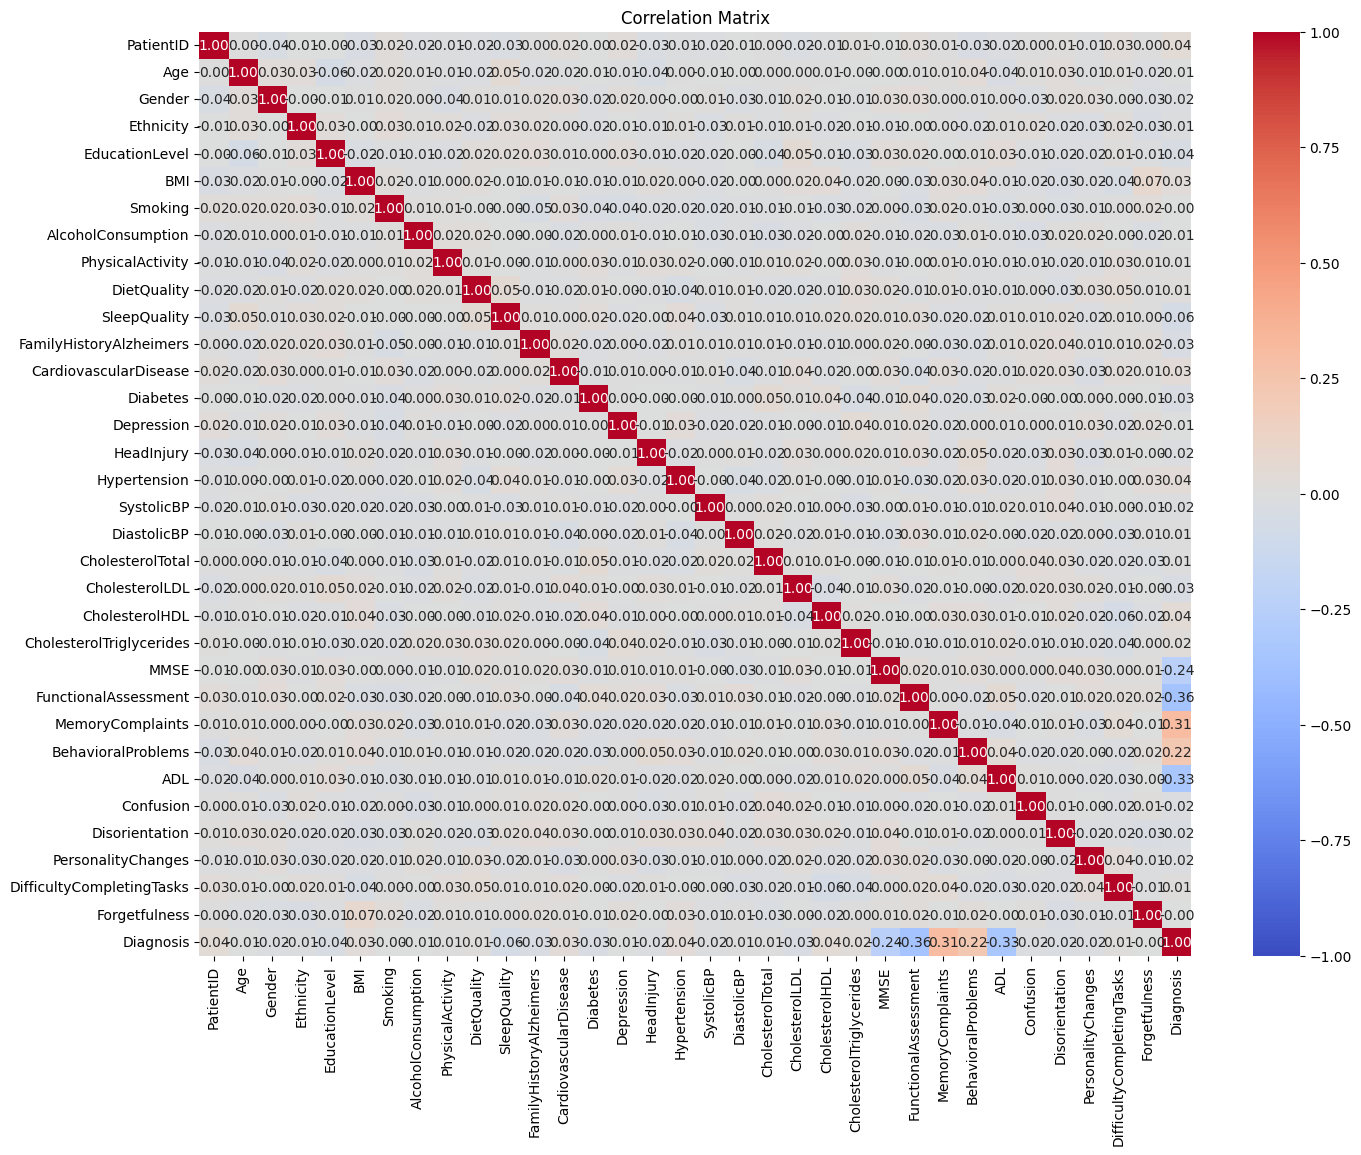

In [34]:
for column in data.columns:
    try:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    except ValueError:
        pass


data = data.dropna(axis=1, how='any')


corr_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [15]:
import numpy as np


# Generate sample data for different distributions
uniform_data = np.random.uniform(low=0, high=10, size=1000)
normal_data = np.random.normal(loc=0, scale=1, size=1000)
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)
poisson_data = np.random.poisson(lam=3, size=1000)
lognormal_data = np.random.lognormal(mean=0, sigma=1, size=1000)
gamma_data = np.random.gamma(shape=2, scale=1, size=1000)
beta_data = np.random.beta(a=2, b=5, size=1000)


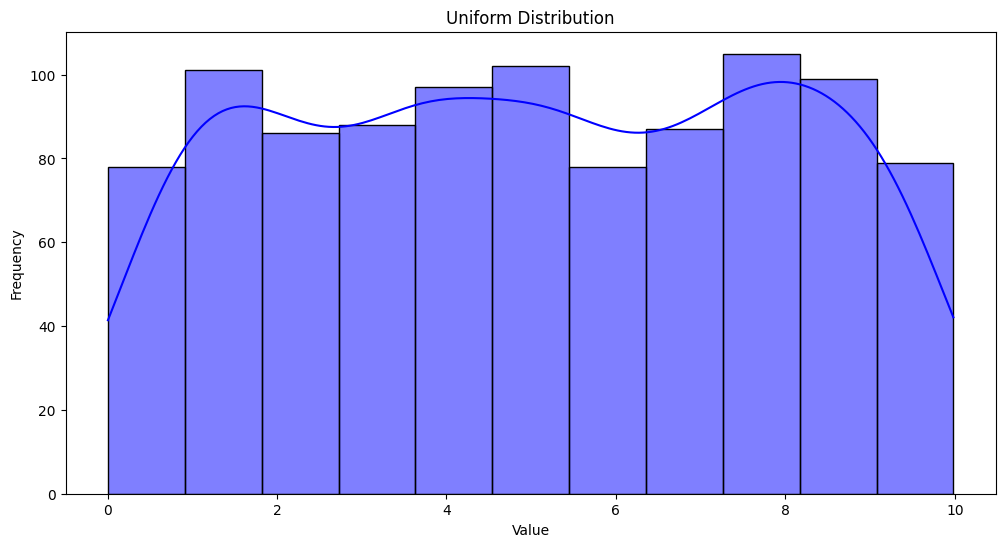

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(uniform_data, kde=True, color='blue')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


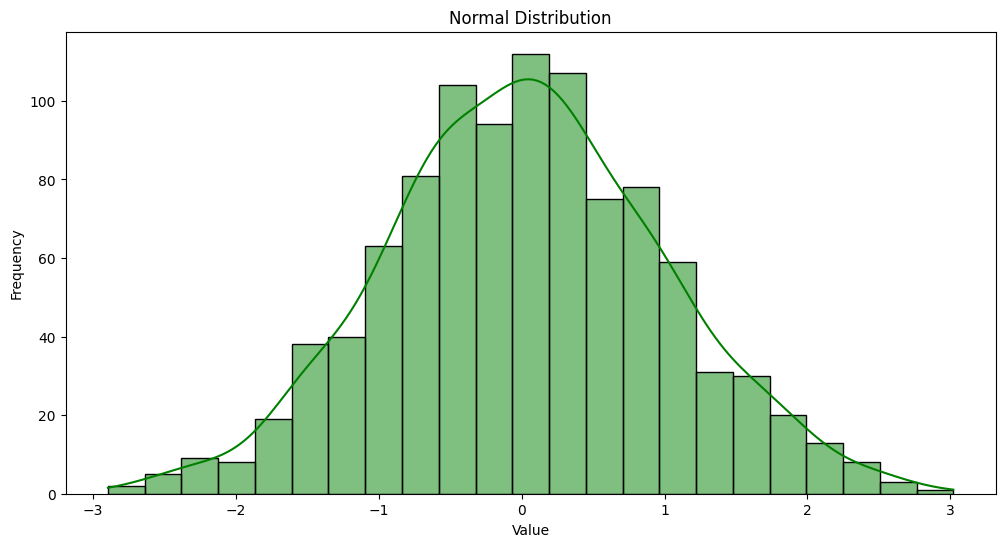

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(normal_data, kde=True, color='green')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

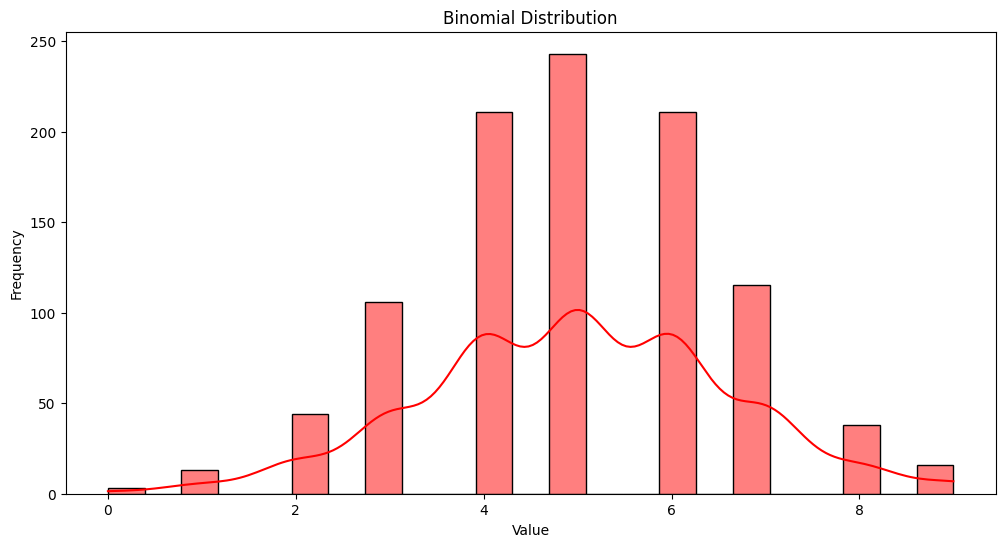

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(binomial_data, kde=True, color='red')
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

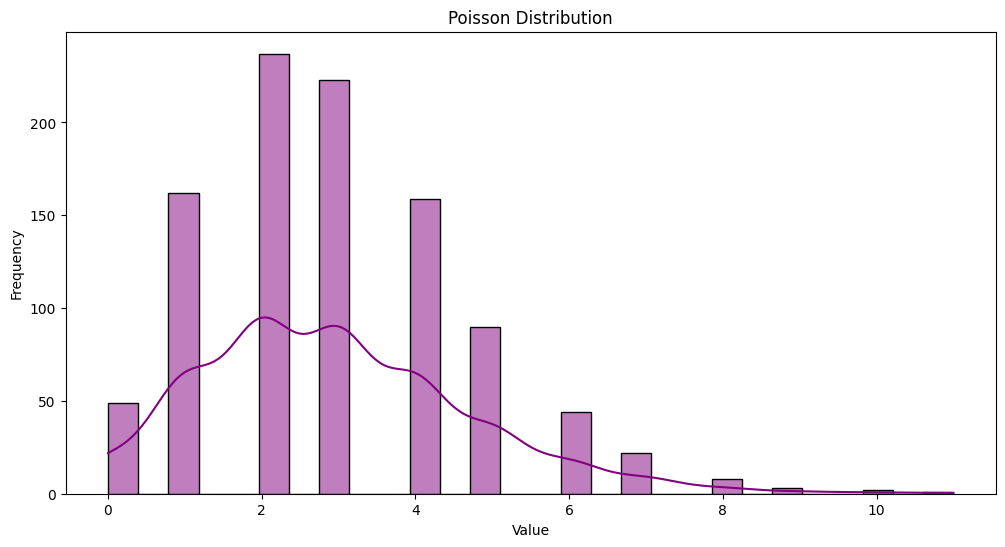

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(poisson_data, kde=True, color='purple')
plt.title('Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

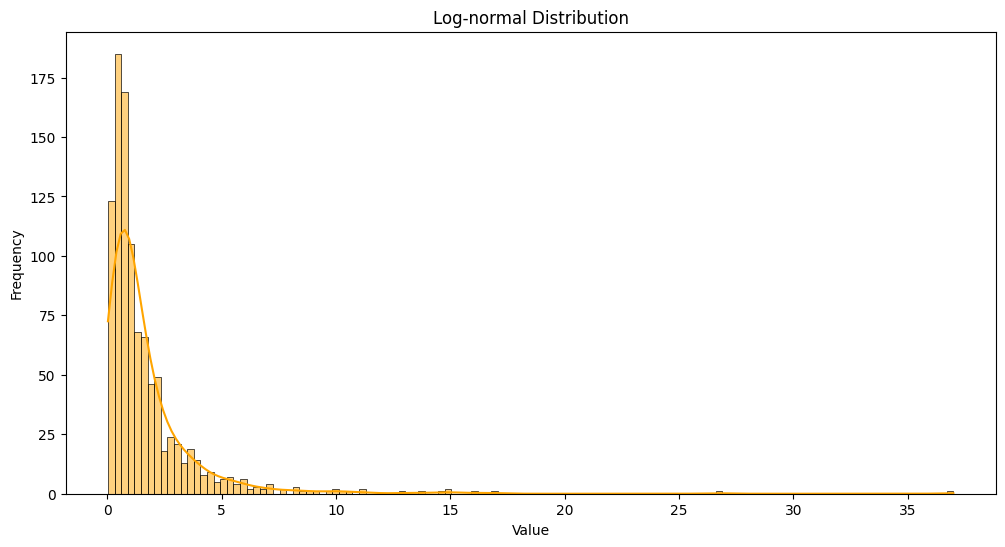

In [20]:
# Plot log-normal distribution
plt.figure(figsize=(12, 6))
sns.histplot(lognormal_data, kde=True, color='orange')
plt.title('Log-normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

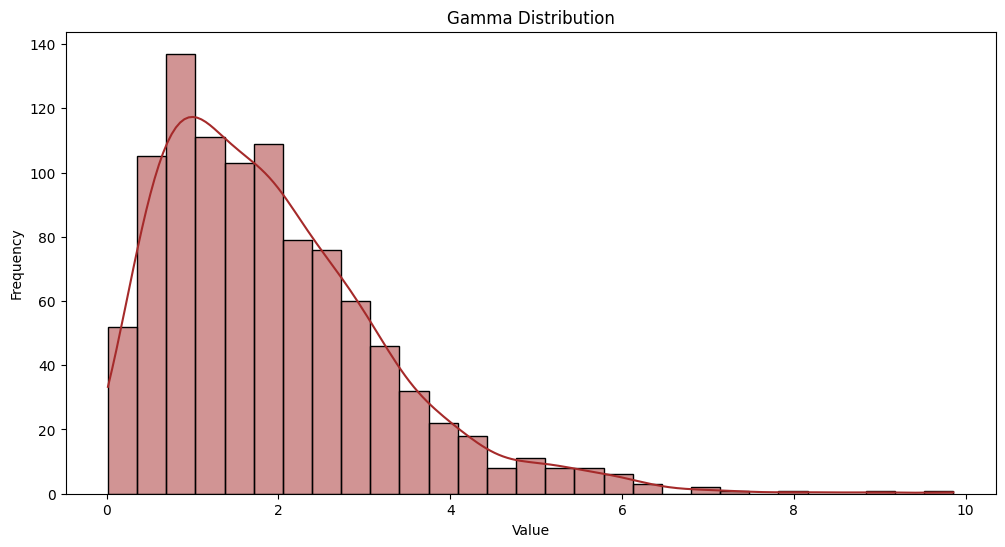

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(gamma_data, kde=True, color='brown')
plt.title('Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

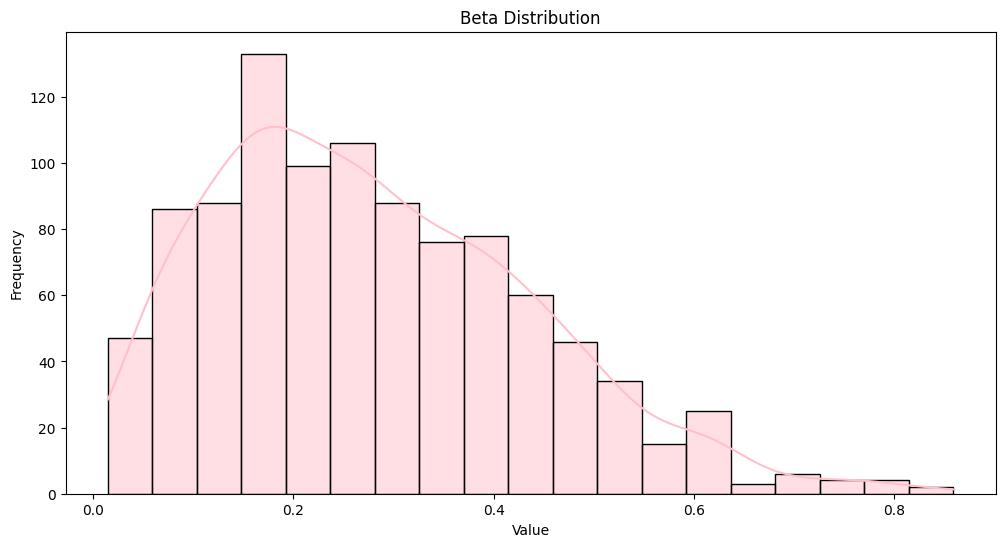

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(beta_data, kde=True, color='pink')
plt.title('Beta Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Bar chart (Gender)

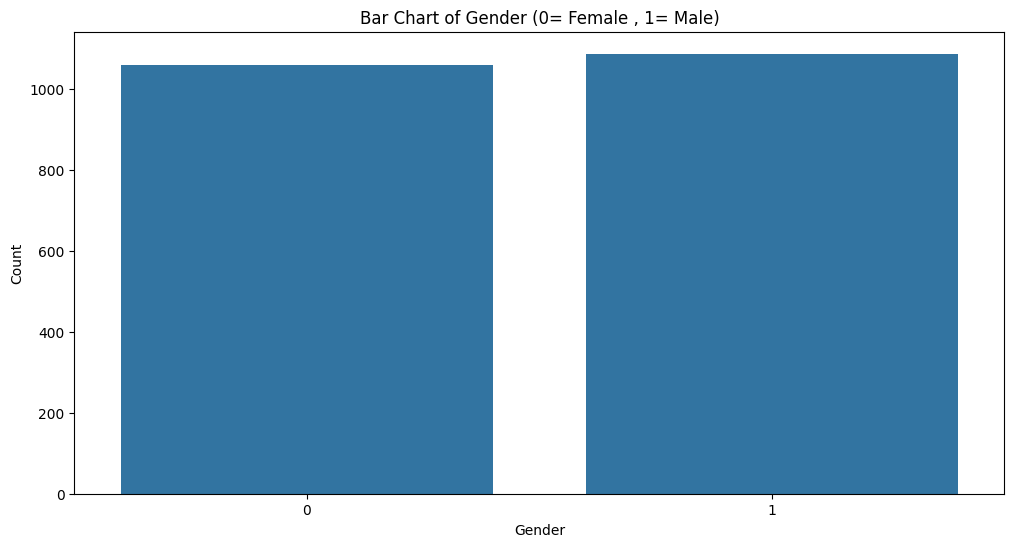

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Gender')
plt.title('Bar Chart of Gender (0= Female , 1= Male)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Scatter Plot

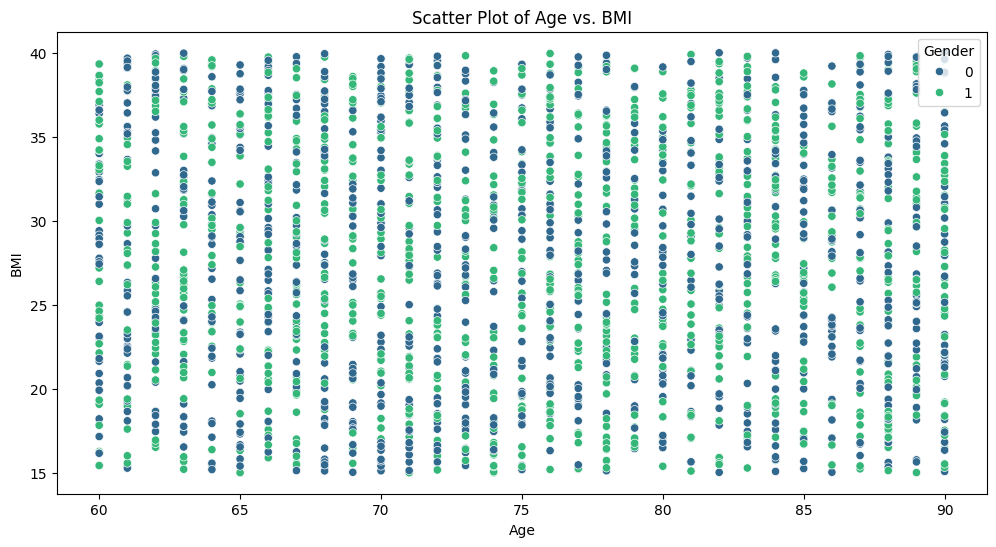

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Age', y='BMI', hue='Gender', palette='viridis')
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


# Histogram

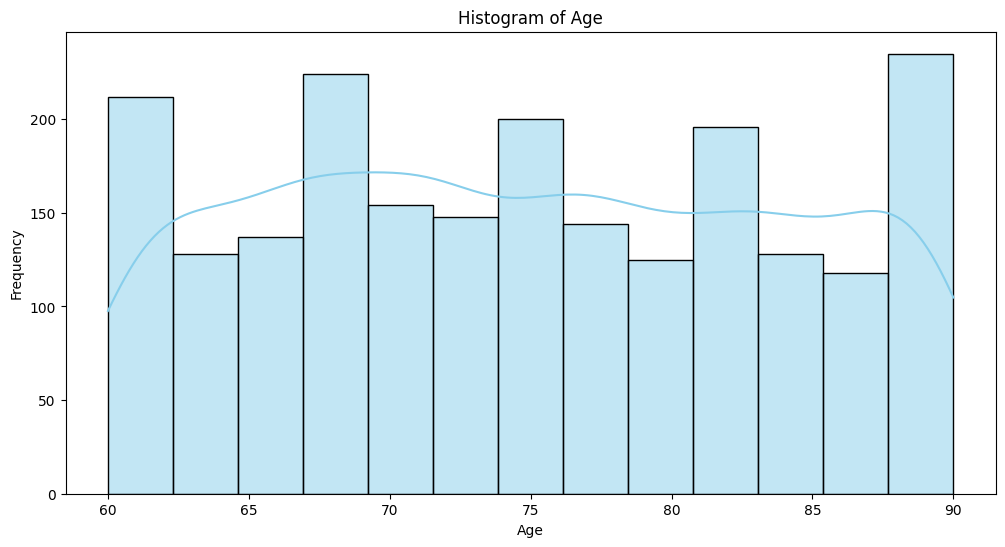

In [29]:
# Histogram of a numerical variable (e.g., Age)
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x1200 with 0 Axes>

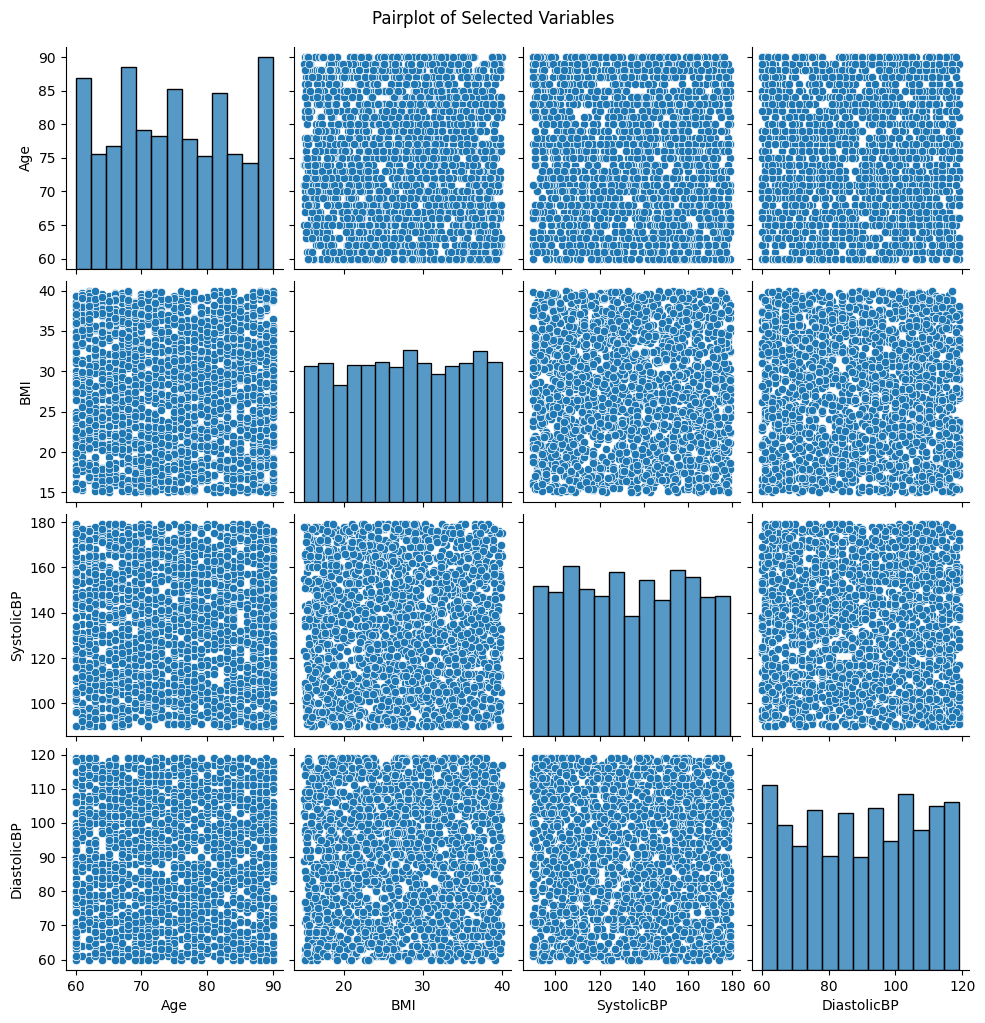

In [30]:
plt.figure(figsize=(12, 12))
sns.pairplot(data[['Age', 'BMI', 'SystolicBP', 'DiastolicBP']])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

# Laber Incoding\

In [ ]:
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

In [ ]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# KNN

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_


In [ ]:
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

In [ ]:
print(f"KNN Accuracy: {accuracy_knn}")
print("KNN Confusion Matrix:")
print(conf_matrix_knn)
print("KNN Classification Report:")
print(class_report_knn)


KNN Accuracy: 0.7441860465116279
KNN Confusion Matrix:
[[251  26]
 [ 84  69]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       277
           1       0.73      0.45      0.56       153

    accuracy                           0.74       430
   macro avg       0.74      0.68      0.69       430
weighted avg       0.74      0.74      0.73       430



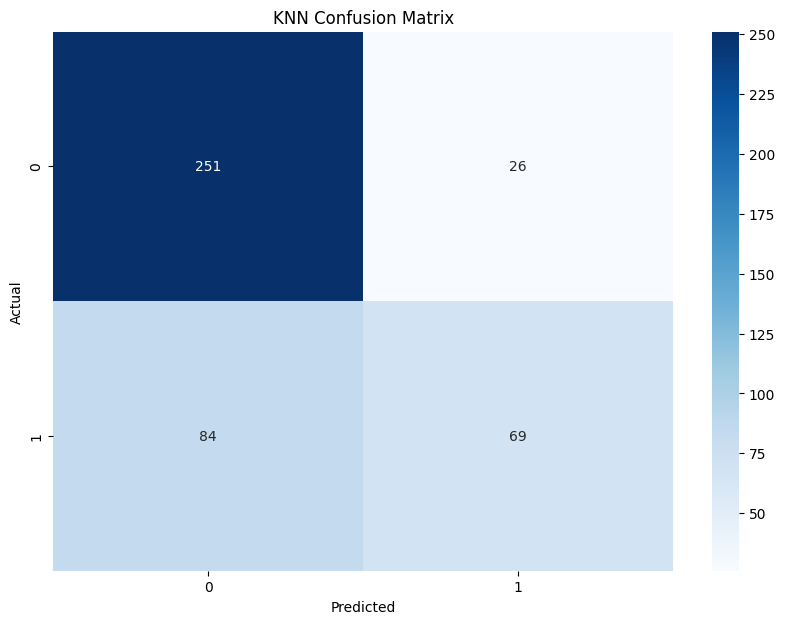

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

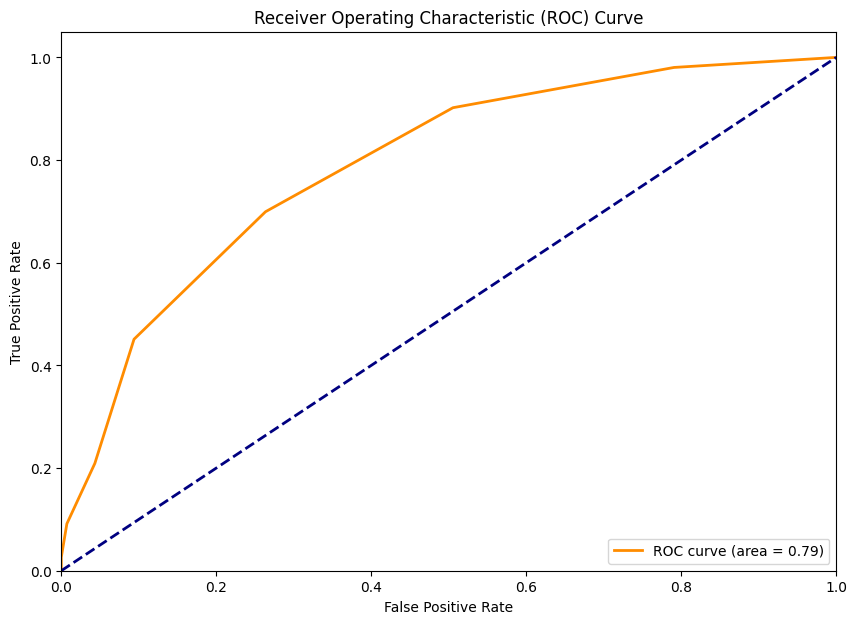

In [ ]:
if len(label_encoder.classes_) == 2:
    y_test_binarized = label_binarize(y_test, classes=[0, 1])
    y_score = best_knn.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)


In [ ]:
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.9279069767441861
Random Forest Confusion Matrix:
[[272   5]
 [ 26 127]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       277
           1       0.96      0.83      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



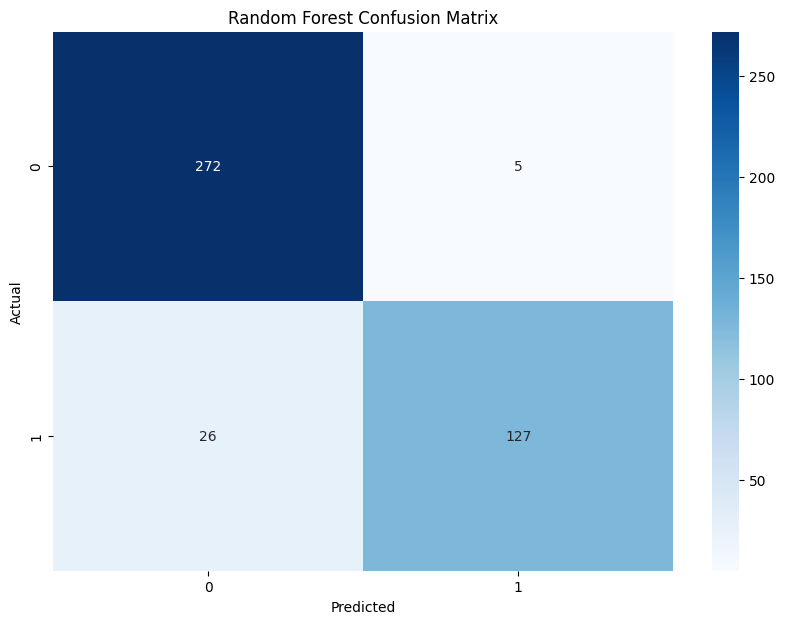

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

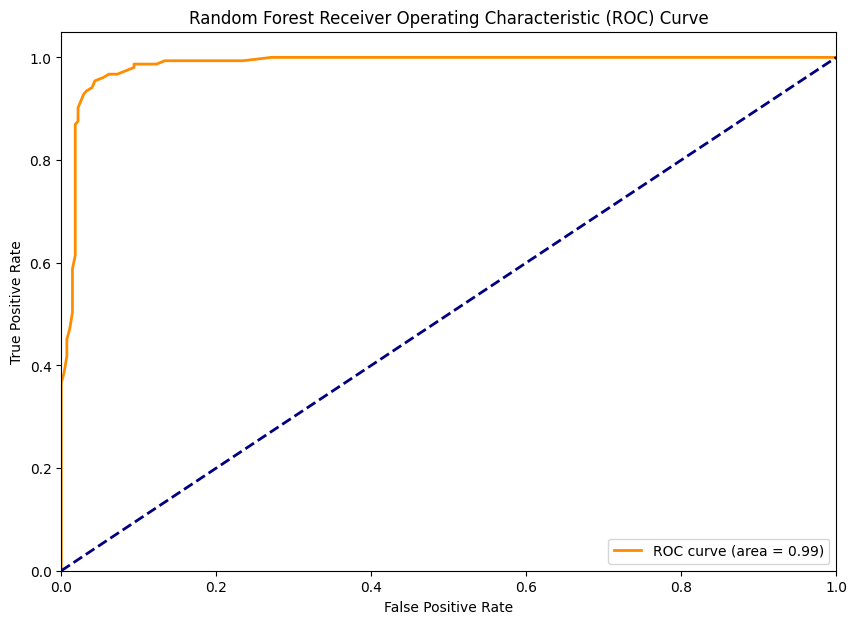

In [ ]:
if len(label_encoder.classes_) == 2:
    y_score_rf = rf.predict_proba(X_test)[:, 1]

    fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized, y_score_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

In [ ]:
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print("Gradient Boosting Confusion Matrix:")
print(conf_matrix_gb)
print("Gradient Boosting Classification Report:")
print(class_report_gb)

Gradient Boosting Accuracy: 0.958139534883721
Gradient Boosting Confusion Matrix:
[[269   8]
 [ 10 143]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.95      0.93      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



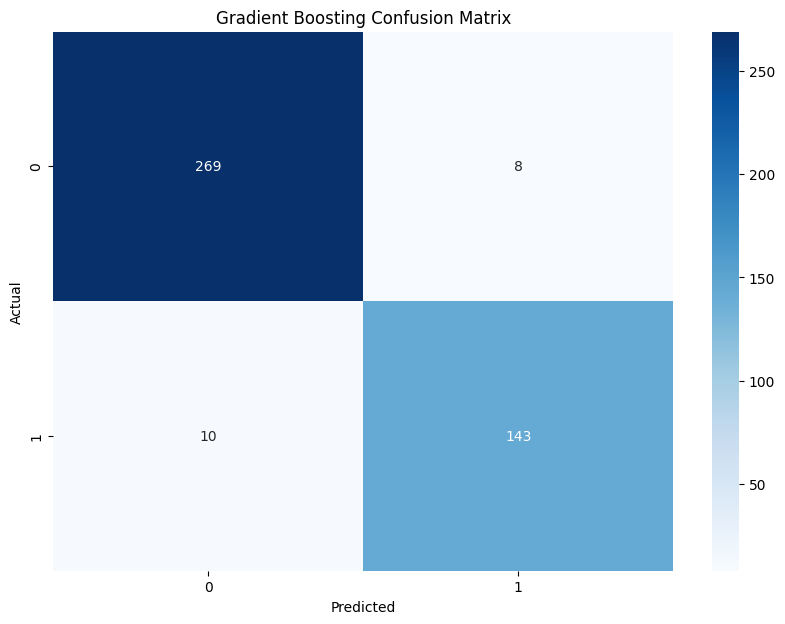

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

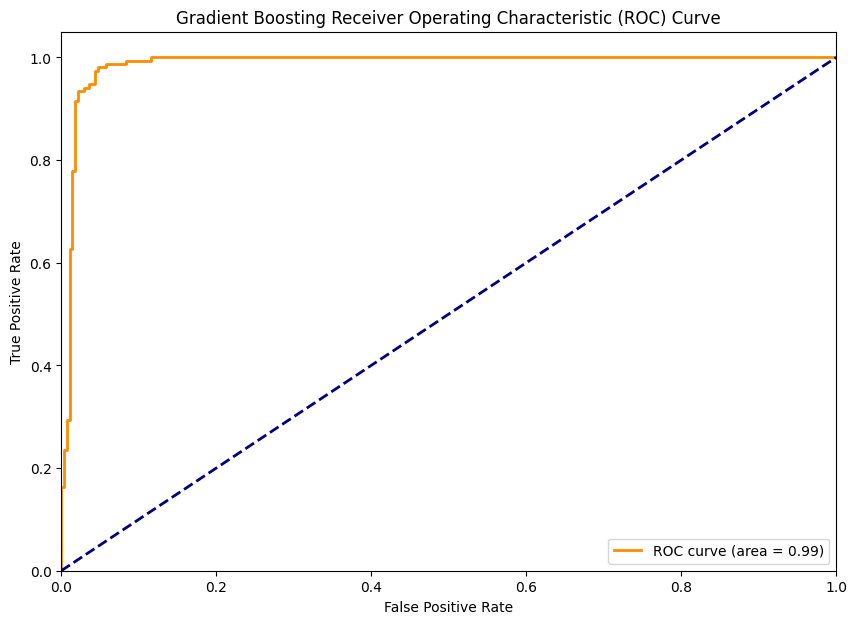

In [ ]:
if len(label_encoder.classes_) == 2:
    y_score_gb = gb.predict_proba(X_test)[:, 1]

    fpr_gb, tpr_gb, _ = roc_curve(y_test_binarized, y_score_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Gradient Boosting Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
model_accuracies = {
    'KNN': accuracy_knn,
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb
}


# Algo Comparison

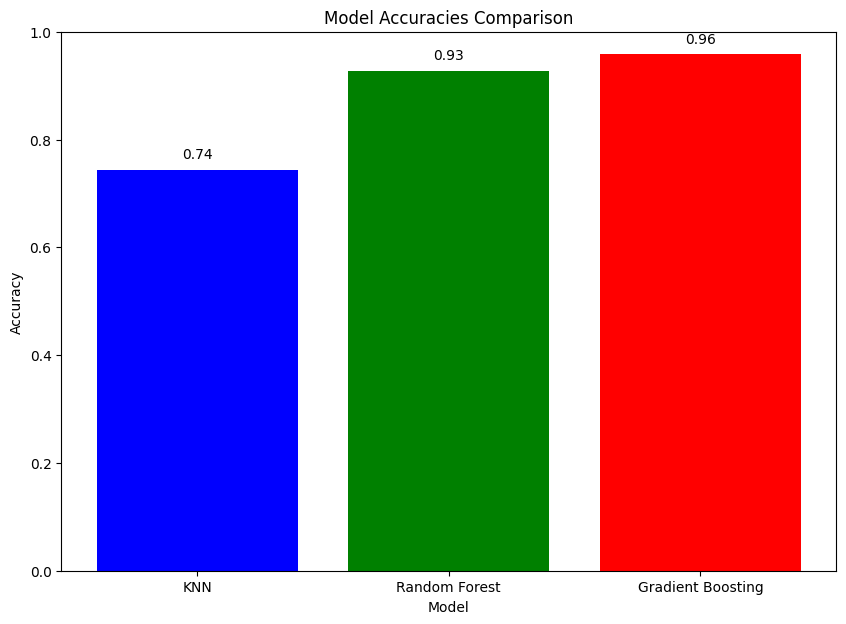

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 1)
for i, (model, accuracy) in enumerate(model_accuracies.items()):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center')
plt.show()

# User Input

In [ ]:
def get_user_input():
    user_data = []
    for column in X.columns:
        value = float(input(f"Enter value for {column}: "))
        user_data.append(value)
    return user_data


def predict_with_user_input(user_data):
    user_data = scaler.transform([user_data])
    prediction_knn = best_knn.predict(user_data)
    prediction_rf = rf.predict(user_data)
    prediction_gb = gb.predict(user_data)

    print(f"KNN Prediction: {label_encoder.inverse_transform(prediction_knn)}")
    print(f"Random Forest Prediction: {label_encoder.inverse_transform(prediction_rf)}")
    print(f"Gradient Boosting Prediction: {label_encoder.inverse_transform(prediction_gb)}")


user_data = get_user_input()
predict_with_user_input(user_data)

Enter value for PatientID: 4751
Enter value for Age: 73
Enter value for Gender: 0
Enter value for Ethnicity: 3
Enter value for EducationLevel: 1
Enter value for BMI: 22.928
Enter value for Smoking: 1
Enter value for AlcoholConsumption: 13.293
Enter value for PhysicalActivity: 6.329
Enter value for DietQuality: 1.347
Enter value for SleepQuality: 9.0
Enter value for FamilyHistoryAlzheimers: 0
Enter value for CardiovascularDisease: 1
Enter value for Diabetes: 1
Enter value for Depression: 1
Enter value for HeadInjury: 0
Enter value for Hypertension: 0
Enter value for SystolicBP: 142
Enter value for DiastolicBP: 72
Enter value for CholesterolTotal: 237.6
Enter value for CholesterolLDL: 56.151
Enter value for CholesterolHDL: 33.683
Enter value for CholesterolTriglycerides: 162.19
Enter value for MMSE: 21.464
Enter value for FunctionalAssessment: 6.0621
Enter value for MemoryComplaints: 0
Enter value for BehavioralProblems: 0
Enter value for ADL: 1.9111
Enter value for Confusion: 0
Enter va

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
